In [3]:
#load our libraries
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1 Load Wine Dataset

In [4]:
wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [5]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

# Predict Wine Quality based on pH

In [6]:
#TODO
x = wine[['pH']]
y = wine[['quality']]
lmodel = linear_model.LinearRegression()
lmodel.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
y_preds = lmodel.predict(x)
MSE = mean_squared_error(y, y_preds)
print("Mean squared error: %.2f" % MSE)
RMSE = np.sqrt(MSE)
print("Root mean squared error: %.2f" % RMSE)

Mean squared error: 0.65
Root mean squared error: 0.81


In [8]:
lmodel.predict([[7],[5],[9]])

array([[4.52204095],
       [5.1260072 ],
       [3.91807469]])

In [9]:
theta_zero = lmodel.intercept_
theta_one = lmodel.coef_[0]
print('theta_zero: ', theta_zero)
print('theta_one: ', theta_one)

theta_zero:  [6.63592283]
theta_one:  [-0.30198313]


Q1 Answer


hypothesis = 6.63592283 + (-0.30198313)*X_1


Q1 End

# Let's Implement Batch (Traditional) Gradient Descent
#### Every 100 iterations, you should see the cost (MSE) decrease towards the cost you calculate from your linear regression above

Q2 Start

In [10]:
wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
x = wine[['pH']]
y = wine[['quality']]
lmodel = linear_model.LinearRegression()
lmodel.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
y_preds = lmodel.predict(x)

In [12]:
def cost_function(theta_zero, theta_one, x, y):
    y_preds = theta_zero + theta_one*x.pH
    return mean_squared_error(y_preds,y)

In [13]:
#initializate thetas
theta_zero = 0
theta_one = 0
theta_zero_direction_sum = 0
theta_one_direction_sum = 0

#15,000 iterations...the same as 15,000 steps
iterations = 15000

#step size...also called learning rate 
step_size = 0.0001

#Our X and y defined
x = wine[['pH']]
y = wine['quality']

#number of training examples
m = len(wine)
#m= 10
#also you can return the first element of pandas dataframe shape, 
#which returns number of rows for the first element and number of columns for the second element
#m = wine.shape[0] -> the increaing number at the 1st column

#iterate through for each iteration
for iteration in range(iterations):
    
    #set our new thetas in the beginning of the loop
    theta_zero = theta_zero + step_size*theta_zero_direction_sum
    theta_one = theta_one + step_size*theta_one_direction_sum
    #print('iteration')
    #print(theta_zero)
    #adding our values for our update for every training example
    #we set each of the direction updates to zero before summing
    theta_zero_direction_sum = 0
    theta_one_direction_sum = 0
    #print('theta_ori')
    #print(theta_zero_direction_sum)
    #row=0
    
    #this loop iterates through all of the training examples
    for row in range(m):
        #TODO program the direction update the same as from the in class algorithm
        theta_zero_direction_sum = theta_zero_direction_sum + ((y[row])-(theta_zero + theta_one*x.pH[row]))
        theta_one_direction_sum = theta_one_direction_sum + ((y[row])-(theta_zero + theta_one*x.pH[row]))*x.pH[row]
      
    #this just means to print every 100 iterations
    #you can print every iteration, but it can become cluttered
    if iteration%100 == 0:
        current_cost = cost_function(theta_zero, theta_one, x, y)
        print(f'iteration: {iteration}')
        print(f'theta_zero: {theta_zero}', 
              f'theta_one: {theta_one}', 
              f'current_error: {current_cost}')
        print()

iteration: 0
theta_zero: 0.0 theta_one: 0.0 current_error: 32.41651031894934

iteration: 100
theta_zero: 0.6620688175742494 theta_one: 1.4983381306317325 current_error: 0.7269570136234607

iteration: 200
theta_zero: 0.8490327214957678 theta_one: 1.4422607041679019 current_error: 0.7221910408973333

iteration: 300
theta_zero: 1.0300736784663282 theta_one: 1.3876926520612969 current_error: 0.7177193925596334

iteration: 400
theta_zero: 1.205450816913391 theta_one: 1.334831703622629 current_error: 0.7135231557647534

iteration: 500
theta_zero: 1.375341339526377 theta_one: 1.283624492484263 current_error: 0.7095853677481209

iteration: 600
theta_zero: 1.5399168932708398 theta_one: 1.2340192820276195 current_error: 0.7058901104921774

iteration: 700
theta_zero: 1.699343755191778 theta_one: 1.1859659541906684 current_error: 0.7024224463797559

iteration: 800
theta_zero: 1.8537830004117755 theta_one: 1.139415958838391 current_error: 0.6991683578106211

iteration: 900
theta_zero: 2.00339066487

iteration: 7400
theta_zero: 6.0490153128190505 theta_one: -0.12508157458386604 current_error: 0.6503350743677074

iteration: 7500
theta_zero: 6.067376520479813 theta_one: -0.13061588116541667 current_error: 0.6502890787439106

iteration: 7600
theta_zero: 6.085163303825412 theta_one: -0.13597704879408568 current_error: 0.6502459160185788

iteration: 7700
theta_zero: 6.102393633530748 theta_one: -0.14117049406480692 current_error: 0.6502054117117714

iteration: 7800
theta_zero: 6.119084918064118 theta_one: -0.14620146411613785 current_error: 0.6501674020898731

iteration: 7900
theta_zero: 6.135254021275617 theta_one: -0.1510750419316313 current_error: 0.6501317335037223

iteration: 8000
theta_zero: 6.150917279435381 theta_one: -0.15579615147538742 current_error: 0.6500982617675023

iteration: 8100
theta_zero: 6.166090517738718 theta_one: -0.1603695626669094 current_error: 0.6500668515758888

iteration: 8200
theta_zero: 6.1807890662949365 theta_one: -0.1647998962003487 current_error: 0.65

iteration: 14700
theta_zero: 6.5782607502682975 theta_one: -0.28460302664990084 current_error: 0.6495954867812702

iteration: 14800
theta_zero: 6.58006468927989 theta_one: -0.28514675730907235 current_error: 0.649595042807074

iteration: 14900
theta_zero: 6.58181219265553 theta_one: -0.2856734775342216 current_error: 0.6495946261775188



Q2 End

Q3 Answer

In [14]:
def cost_function(theta_zero, theta_one, x, y):
    y_preds = theta_zero + theta_one*x.pH
    return mean_squared_error(y_preds,y)

In [16]:
#initializate thetas
theta_zero = 0
theta_one = 0
theta_zero_direction_sum = 0
theta_one_direction_sum = 0

#15,000 iterations...the same as 15,000 steps
iterations = 15000

#step size...also called learning rate 
step_size = 0.00015

#Our X and y defined
x = wine[['pH']]
y = wine['quality']

#number of training examples
m = len(wine)
#m= 10
#also you can return the first element of pandas dataframe shape, 
#which returns number of rows for the first element and number of columns for the second element
#m = wine.shape[0] -> the increaing number at the 1st column

#iterate through for each iteration
for iteration in range(iterations):
    
    #set our new thetas in the beginning of the loop
    theta_zero = theta_zero + step_size*theta_zero_direction_sum
    theta_one = theta_one + step_size*theta_one_direction_sum
    #print('iteration')
    #print(theta_zero)
    #adding our values for our update for every training example
    #we set each of the direction updates to zero before summing
    theta_zero_direction_sum = 0
    theta_one_direction_sum = 0
    #print('theta_ori')
    #print(theta_zero_direction_sum)
    #row=0
    
    #this loop iterates through all of the training examples
    for row in range(m):
        #TODO program the direction update the same as from the in class algorithm
        theta_zero_direction_sum = theta_zero_direction_sum + ((y[row])-(theta_zero + theta_one*x.pH[row]))
        theta_one_direction_sum = theta_one_direction_sum + ((y[row])-(theta_zero + theta_one*x.pH[row]))*x.pH[row]
      
    #this just means to print every 100 iterations
    #you can print every iteration, but it can become cluttered
    if iteration%100 == 0:
        current_cost = cost_function(theta_zero, theta_one, x, y)
        print(f'iteration: {iteration}')
        print(f'theta_zero: {theta_zero}', 
              f'theta_one: {theta_one}', 
              f'current_error: {current_cost}')
        print()

iteration: 0
theta_zero: 0.0 theta_one: 0.0 current_error: 32.41651031894934

iteration: 100
theta_zero: -9.204020363795572e+26 theta_one: -3.0536242747541985e+27 current_error: 1.2191164326062944e+56

iteration: 200
theta_zero: -1.8054143795548948e+54 theta_one: -5.989835916796666e+54 current_error: 4.6907667472252157e+110

iteration: 300
theta_zero: -3.5414101154373767e+81 theta_one: -1.1749361113864312e+82 current_error: 1.8048557207809986e+165

iteration: 400
theta_zero: -6.946652108096367e+108 theta_one: -2.3046956294223845e+109 current_error: 6.944502569356668e+219

iteration: 500
theta_zero: -1.362620366970856e+136 theta_one: -4.520775123688114e+136 current_error: 2.672020559900046e+274



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


iteration: 600
theta_zero: -2.672847633063362e+163 theta_one: -8.867725290077176e+163 current_error: inf



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


iteration: 700
theta_zero: -5.242923592470683e+190 theta_one: -1.7394484279528065e+191 current_error: inf



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


iteration: 800
theta_zero: -1.0284255434710283e+218 theta_one: -3.4120146199082545e+218 current_error: inf



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


iteration: 900
theta_zero: -2.0173078623204632e+245 theta_one: -6.692836406865412e+245 current_error: inf



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


iteration: 1000
theta_zero: -3.95704972247645e+272 theta_one: -1.3128331545738196e+273 current_error: inf



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


iteration: 1100
theta_zero: -7.761949873204092e+299 theta_one: -2.5751875392924737e+300 current_error: inf



C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in double_scalars
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Stochastic Gradient Descent - Extra Credit
#### implement stochastic gradient descent for extra credit

In [17]:
#TODO
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 

from sklearn.datasets.samples_generator import make_regression

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: UserWarning: The following kwargs were not used by contour: 'color'


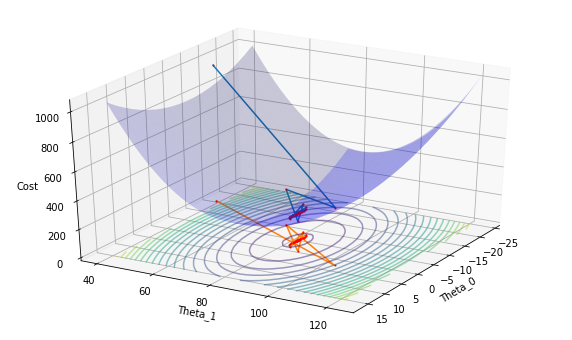

In [18]:
#code adapted from http://tillbergmann.com/blog/python-gradient-descent.html
x = wine[['pH']]
y = wine[['quality']]
x, y = make_regression(n_samples = 100, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2017)
def gradient_descent(x, y, theta_init, step=0.001, maxsteps=0, precision=0.001, ):
    costs = []
    m = y.size # number of data points
    theta = theta_init
    history = [] # to store all thetas
    preds = []
    counter = 0
    oldcost = 0
    pred = np.dot(x, theta)
    error = pred - y 
    currentcost = np.sum(error ** 2) / (2 * m)
    preds.append(pred)
    costs.append(currentcost)
    history.append(theta)
    counter+=1
    while abs(currentcost - oldcost) > precision:
        oldcost=currentcost
        gradient = x.T.dot(error)/m 
        theta = theta - step * gradient  # update
        history.append(theta)
        
        pred = np.dot(x, theta)
        error = pred - y 
        currentcost = np.sum(error ** 2) / (2 * m)
        costs.append(currentcost)
        
        if counter % 25 == 0: preds.append(pred)
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, preds, counter

xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step=1.9)
theta = history[-1]


def error(x, y, THETA):
    return np.sum((x.dot(THETA) - y)**2)/(2*y.size)

ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(xaug, y, theta) 
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('Theta_0')
ax.set_ylabel('Theta_1')
ax.set_zlabel('Cost')
ax.view_init(elev=30., azim=30)
#ax.plot([theta[0]], [theta[1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);
#ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);


ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2);
ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2);

plt.show()